# Gridworld problem

The Gridworld problem in `RL` is a problem where we want to create an optimal strategy for an agent to traverse a grid. A grid is a square matrix of cells, and the agent can move in any of the four directions (up, down, left, right) in each cell. The agent receives a reward of -1 for each step it takes, and a reward of +10 if it reaches the goal cell.

In this example, there will be 5 goal cells: one in each corner and the in the center. The agent can start from any non goal squares and has to reach one of the goal cells. The agent can only move in the four directions, and cannot move diagonally.

In [1]:
# Importing the needed packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from typing import Tuple

In [2]:
def array_index_to_matplot_coords(i: int, j: int, n_cols: int) -> Tuple[int, int]:
    """Converts an array index to a matplot coordinate"""
    x = j
    y = n_cols - i - 1
    return x, y

In [3]:
def plot_matrix(
    M: np.array, 
    goal_coords: list = [],
    img_width: int = 5, 
    img_height: int = 5, 
    title: str = None,
    annotate_goal: bool = True
    ) -> None: 
    """
    Plots a matrix as an image.
    """
    height, width = M.shape

    fig = plt.figure(figsize=(img_width, img_width))
    ax = fig.add_subplot(111, aspect='equal')
    
    for y in range(height):
        for x in range(width):
            # By default, the (0, 0) coordinate in matplotlib is the bottom left corner,
            # so we need to invert the y coordinate to plot the matrix correctly
            matplot_x, matplot_y = array_index_to_matplot_coords(x, y, height)
            
            # If there is a tuple of (x, y) in the goal_coords list, we color the cell gray 
            if (x, y) in goal_coords:
                ax.add_patch(matplotlib.patches.Rectangle((matplot_x - 0.5, matplot_y - 0.5), 1, 1, facecolor='gray'))
                if annotate_goal:
                    ax.annotate(str(M[x][y]), xy=(matplot_x, matplot_y), ha='center', va='center')
            else: 
                ax.annotate(str(M[x][y]), xy=(matplot_x, matplot_y), ha='center', va='center')

    offset = .5    
    ax.set_xlim(-offset, width - offset)
    ax.set_ylim(-offset, height - offset)

    ax.hlines(y=np.arange(height+1)- offset, xmin=-offset, xmax=width-offset)
    ax.vlines(x=np.arange(width+1) - offset, ymin=-offset, ymax=height-offset)

    plt.title(title)
    plt.show()

def plot_policy_matrix(P: dict, S:np.array, goal_coords: list = [], img_width: int = 5, img_height: int = 5, title: str = None) -> None: 
    """ 
    Plots the policy matrix out of the dictionary provided; The dictionary values are used to draw the arrows 
    """
    height, width = S.shape

    fig = plt.figure(figsize=(img_width, img_width))
    ax = fig.add_subplot(111, aspect='equal')
    for y in range(height):
        for x in range(width):
            matplot_x, matplot_y = array_index_to_matplot_coords(x, y, height)
            
            # If there is a tuple of (x, y) in the goal_coords list, we color the cell gray 
            if (x, y) in goal_coords:
                ax.add_patch(matplotlib.patches.Rectangle((matplot_x - 0.5, matplot_y - 0.5), 1, 1, facecolor='gray'))
            
            else:
                # Adding the arrows to the plot
                if 'up' in P[S[x, y]]:
                    plt.arrow(matplot_x, matplot_y, 0, 0.3, head_width = 0.05, head_length = 0.05)
                if 'down' in P[S[x, y]]:
                    plt.arrow(matplot_x, matplot_y, 0, -0.3, head_width = 0.05, head_length = 0.05)
                if 'left' in P[S[x, y]]:
                    plt.arrow(matplot_x, matplot_y, -0.3, 0, head_width = 0.05, head_length = 0.05)
                if 'right' in P[S[x, y]]:
                    plt.arrow(matplot_x, matplot_y, 0.3, 0, head_width = 0.05, head_length = 0.05)


    offset = .5    
    ax.set_xlim(-offset, width - offset)
    ax.set_ylim(-offset, height - offset)

    ax.hlines(y=np.arange(height+1)- offset, xmin=-offset, xmax=width-offset)
    ax.vlines(x=np.arange(width+1) - offset, ymin=-offset, ymax=height-offset)

    plt.title(title)

def plot_policy_value_matrix(
    P: dict, 
    S: np.array, 
    V: np.array, 
    goal_coords: list = [], 
    img_width: int = 5, 
    img_height: int = 5, 
    title: str = None, 
    annotate_goal: bool = False
    ) -> None: 
    """ 
    Plots the policy matrix out of the dictionary provided; The dictionary values are used to draw the arrows 
    """
    height, width = S.shape

    fig = plt.figure(figsize=(img_width, img_width))
    # The first plot is the value matrix 
    ax = fig.add_subplot(121, aspect='equal')
    for y in range(height):
        for x in range(width):
            # By default, the (0, 0) coordinate in matplotlib is the bottom left corner,
            # so we need to invert the y coordinate to plot the matrix correctly
            matplot_x, matplot_y = array_index_to_matplot_coords(x, y, height)
            
            # If there is a tuple of (x, y) in the goal_coords list, we color the cell gray 
            if (x, y) in goal_coords:
                ax.add_patch(matplotlib.patches.Rectangle((matplot_x - 0.5, matplot_y - 0.5), 1, 1, facecolor='gray'))
                if annotate_goal:
                    ax.annotate(str(V[x][y]), xy=(matplot_x, matplot_y), ha='center', va='center')
            else: 
                ax.annotate(str(V[x][y]), xy=(matplot_x, matplot_y), ha='center', va='center')

    offset = .5
    ax.set_xlim(-offset, width - offset)
    ax.set_ylim(-offset, height - offset)

    ax.hlines(y=np.arange(height+1)- offset, xmin=-offset, xmax=width-offset)
    ax.vlines(x=np.arange(width+1) - offset, ymin=-offset, ymax=height-offset)
    ax.set_title('Value Matrix')

    # The second plot is the policy matrix 
    ax = fig.add_subplot(122, aspect='equal')
    for y in range(height):
        for x in range(width):
            matplot_x, matplot_y = array_index_to_matplot_coords(x, y, height)
            
            # If there is a tuple of (x, y) in the goal_coords list, we color the cell gray 
            if (x, y) in goal_coords:
                ax.add_patch(matplotlib.patches.Rectangle((matplot_x - 0.5, matplot_y - 0.5), 1, 1, facecolor='gray'))
            
            else:
                # Adding the arrows to the plot
                if 'up' in P[S[x, y]]:
                    plt.arrow(matplot_x, matplot_y, 0, 0.3, head_width = 0.05, head_length = 0.05)
                if 'down' in P[S[x, y]]:
                    plt.arrow(matplot_x, matplot_y, 0, -0.3, head_width = 0.05, head_length = 0.05)
                if 'left' in P[S[x, y]]:
                    plt.arrow(matplot_x, matplot_y, -0.3, 0, head_width = 0.05, head_length = 0.05)
                if 'right' in P[S[x, y]]:
                    plt.arrow(matplot_x, matplot_y, 0.3, 0, head_width = 0.05, head_length = 0.05)
    
    offset = .5
    ax.set_xlim(-offset, width - offset)
    ax.set_ylim(-offset, height - offset)

    ax.hlines(y=np.arange(height+1)- offset, xmin=-offset, xmax=width-offset)
    ax.vlines(x=np.arange(width+1) - offset, ymin=-offset, ymax=height-offset)
    ax.set_title('Policy Matrix')

# Matrices and sets used in an RL problem 

## Action set

The $\mathbb{A}$ set contains all the possible actions that the agent can take. In this case, the agent can move in any of the four directions, so the action set is $\mathbb{A} = \{up, down, left, right\}$ or $\mathbb{A} = \{\uparrow,  \downarrow, \leftarrow, \rightarrow\}$

##  Reward matrix 

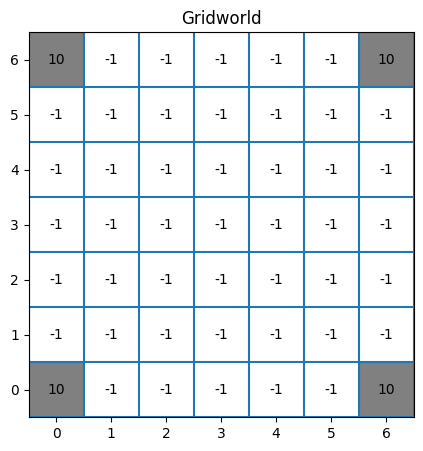

In [4]:
# Defining the number of blocks of a n x n grid 
n = 7

# Defining the value for the hole and the goal
goal = 10
step = -1

# Initiating an empty dataframe of size n x n
G = np.ones((n,n))

# Defining the coordinates of the goal
goal_coords = [(0, n-1), (n-1, 0), (0, 0), (n-1, n-1)]
#goal_coords = [(1, 2)]
# Adding the goal values to the center and the corners
for goal_coord in goal_coords:
    G[goal_coord[0], goal_coord[1]] = goal

# Every other step is -1
G[G == 1] = step

# Converting the G matrix to int 
G = G.astype(int)

plot_matrix(G, goal_coords, title='Gridworld')

In the above diagram, the gridworld is represented as a `n` by `n` matrix. Each cell in it represent the reward you get when you transition to that state. We can call the above matrix as the `reward matrix` and denote it $\mathbb{G}$. Each element in the matrix is a real number: 

$\forall r \in \mathbb{G}, r \in \mathbb{R}$ 

## State matrix

Alongside the $\mathbb{G}$ matrix, we have the the state matrix $\mathbb{S}$.

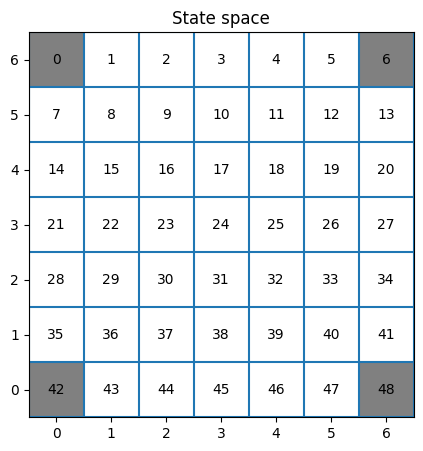

In [5]:
S = np.arange(0, n*n).reshape(n, n)

plot_matrix(S, goal_coords, title='State space')

In [6]:
S

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39, 40, 41],
       [42, 43, 44, 45, 46, 47, 48]])

In [7]:
S

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39, 40, 41],
       [42, 43, 44, 45, 46, 47, 48]])

The state matrix is just a matrix whose each element gives an index to the grid an agent is in. 

For simplicity sake, we in the algorithms and the calculations we tend to flatten these matrices and not keep track of the row and the column indices - just the state numbers. We can always go back to the plot above and check were a certain state is. 

## Policy matrix 

The policy matrix, denoted as $\mathbb{P}$ is a matrix whose each element is a probability of taking an action in a certain state. In each of the elements of the grid, the values are an array of all the possible actions an agent can take.  

In [8]:
# Saving all the unique states to a vector 
states = np.unique(S)

# Dictionary to hold each action for a given state
P = {}
for s in states: 
    s_dict = {}

    # Checking which index is the current state in the S matrix 
    s_index = np.where(S == s)

    # If the state is in the top left corner, we can only move right and down
    if s_index == (0, 0):
        s_dict['right'] = 0.5
        s_dict['down'] = 0.5
    
    # If the state is in the top right corner, we can only move left and down
    elif s_index == (0, n - 1):
        s_dict['left'] = 0.5
        s_dict['down'] = 0.5
    
    # If the state is in the bottom left corner, we can only move right and up
    elif s_index == (n - 1, 0):
        s_dict['right'] = 0.5
        s_dict['up'] = 0.5
    
    # If the state is in the bottom right corner, we can only move left and up
    elif s_index == (n - 1, n - 1):
        s_dict['left'] = 0.5
        s_dict['up'] = 0.5
    
    # If the state is in the first row, we can only move left, right, and down
    elif s_index[0] == 0:
        s_dict['left'] = 0.333
        s_dict['right'] = 0.333
        s_dict['down'] = 0.333
    
    # If the state is in the last row, we can only move left, right, and up
    elif s_index[0] == n - 1:
        s_dict['left'] =  0.333
        s_dict['right'] = 0.333
        s_dict['up'] = 0.333
    
    # If the state is in the first column, we can only move up, down, and right
    elif s_index[1] == 0:
        s_dict['up'] = 0.333
        s_dict['down'] = 0.333
        s_dict['right'] = 0.333
    
    # If the state is in the last column, we can only move up, down, and left
    elif s_index[1] == n - 1:
        s_dict['up'] = 0.333
        s_dict['down'] = 0.333
        s_dict['left'] = 0.333

    # If the state is in the middle, we can move in all directions
    else:
        s_dict['up'] = 0.25
        s_dict['down'] = 0.25
        s_dict['left'] = 0.25
        s_dict['right'] = 0.25

    # Saving the current states trasition probabilities
    P[s] = s_dict

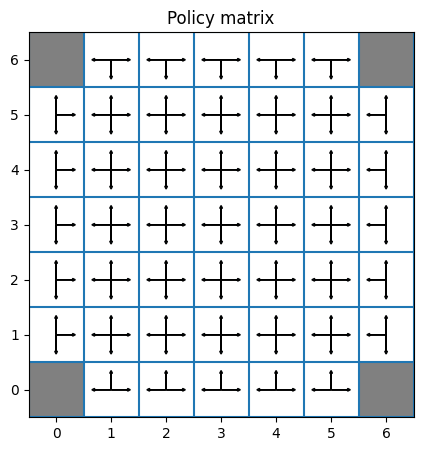

In [9]:
# Drawing a plot for the policy matrix with arrows; In one cell there can be the maximum of 4 arrows each indicating the action an agent can take 
plot_policy_matrix(P, S, goal_coords, title='Policy matrix')

The above matrix shows the initial uniform policy - in each state, the probability of transition to any of the four directions is equal to the available actions.  

## Value matrix 

The value matrix is denoted as $\mathbb{V}$. The dimension of the matrix is the same as the state space. Each grid in the value matrix represents the total reward an agent can get if it starts from that state and follows the policy. 

$$v_{\pi} (s) = \mathbb{E}\left[G_{t} | S_{t} = s \right] $$

Where 

$G_{t}$ - total reward an agent gets after taking action `a` in state `s` and following the policy $\pi$ till the end of the episode. The equation for $G_{t}$ is given below.

$$G_{t} = \R_{t +1} + \gamma R_{t + 2} + ... + \gamma ^{K} R_{t+K}$$
 
$K$ - the number of steps in the episode.

$$v_{\pi} (s) = \sum_{a \in \mathbb{A}} \left[ \pi(a | s) \sum_{s^{'}, r} p(s^{'}, r | s, a) \left[ r + \gamma v_{\pi} (s^{'}) \right] \right] $$

This equation is called the Bellman equation.

Where, 

$\pi(a | s)$ is the probability of taking action `a` in state `s`

$p(s^{'}, r | s, a)$ is the probability of transitioning to state `s'` with reward `r` when taking action `a` in state `s`

$\gamma \in (0, 1)$ is the discount factor

$v_{\pi} (s)$ is the value of state `s` under policy $\pi$. 

$r$ - reward for taking action `a` in state `s`. 

The above equation is a recursive one and could go on forever. In practice, we use a finite number of iterations to calculate the value of each state. 

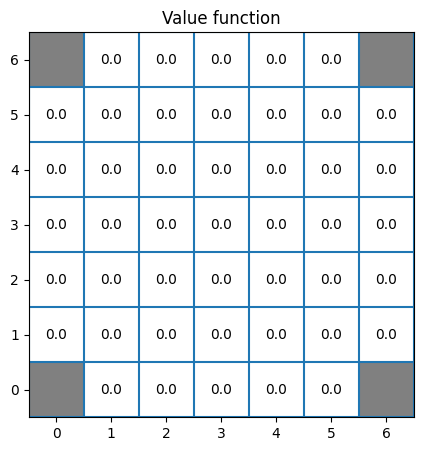

In [10]:
# Initiating the empty Value function 
V = np.zeros((n, n))

plot_matrix(V, goal_coords, title='Value function', annotate_goal=False)

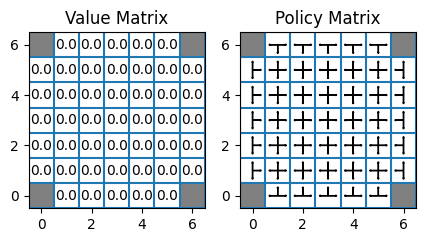

In [11]:
plot_policy_value_matrix(P, S, V, goal_coords, title='Policy value matrix')

Because we have not started exploring anything, the value of each state is 0. 

## Bellman equation simplification for GridWorld 

After we take an action from any given state, we are guaranteed to get a reward and transition to a new state. Thus, the conditional probability of getting a reward and transitioning to a new state is 1.

We can simplify the Bellman equation as follows: 

$$v_{\pi} (s) = \sum_{a \in \mathbb{A}} \left[ \pi(a | s) \left[ r + \gamma v_{\pi} (s^{'}) \right] \right] $$

Here

$s^{'}$ - the state we transition to after taking action `a` in state `s` 

In [12]:
def get_next_state(a: str, s: int, S: np.array): 
    """ 
    Function that returns the next state's coordinates given an action and a state 
    """
    # Getting the current indexes 
    s_index = np.where(S == s)
    s_row = s_index[0][0]
    s_col = s_index[1][0]

    # Defining the indexes of the next state
    next_row = s_row 
    next_col = s_col

    if a == 'up':
        next_row = s_row - 1
        next_col = s_col
    elif a == 'down':
        next_row = s_row + 1
        next_col = s_col
    elif a == 'left':
        next_row = s_row
        next_col = s_col - 1
    elif a == 'right':
        next_row = s_row
        next_col = s_col + 1

    return next_row, next_col

# Value iteration for optimal policy 

We will follow the bellow algorithm to find the best possible policy for the agent to follow.

![](media/chapter-4/value-iteration.png)

Value iteration algorithm is defined as: 

1. Initialize the value matrix $\mathbb{V}$ with zeros.
2. Initialize a constant $\theta > 0$.
3. Loop: 
    1. Set $\delta = 0$.
    2. For each state `s` in the state space $\mathbb{S}$:
        1. Set $v \leftarrow V(s)$
        2. $V(s) \leftarrow max_{a} \left[\pi(a | s) \left[ r + \gamma V (s^{'}) \right]\right]$ 
        3. Set $\delta \leftarrow max(\delta, |v - V(s)|)$
    3. If $\delta < \theta$:
        Exit the loop.

To get the final policy, we can use the following algorithm:

$\pi(s) = \arg \max_{a} [r + \gamma V(s^{'})]$ $\forall s \in \mathbb{S}$ 

In [13]:
def bellman_value(
    s: int, 
    S: np.array, 
    P: dict, 
    G: np.array, 
    V: np.array, 
    gamma: float = 0.9
    ) -> Tuple: 
    """
    Calculates the Belman equation value for the given state
    """
    # Extracting all the available actions for the given state
    actions = P[s]

    # Placeholder to hold the sum 
    sum = 0
    for action in actions: 
        # Extracting the probability of the given action 
        prob = actions[action]

        # Getting the next states indexes
        next_row, next_col = get_next_state(action, s, S)

        # Extracting the expected reward 
        reward = G[next_row, next_col]

        # Extracting the value of the next state
        value_prime = V[next_row, next_col]

        # Adding to the sum 
        sum += prob * (reward + gamma * value_prime)

    return sum

def get_max_return(s: int, S: np.array, P: dict, G: np.array, V: np.array, gamma: float = 0.9) -> Tuple:
    """
    Returns the best action and the Bellman's value for the given state
    """
    # Extracting all the available actions for the given state
    actions = P[s]

    # Placeholder to hold the best action and the max return 
    best_action = None
    max_return = -np.inf

    for action in actions: 
        # Getting the probability of the action 
        prob = actions[action]

        # Getting the next states indexes
        next_row, next_col = get_next_state(action, s, S)

        # Extracting the expected reward 
        reward = G[next_row, next_col]

        # Extracting the value of the next state
        value_prime = V[next_row, next_col]

        # Calculating the return 
        _return = prob * (reward + gamma * value_prime)

        # Checking if the return is greater than the current max return
        if _return > max_return:
            best_action = action
            max_return = _return

    return best_action, max_return

def update_value(s, S, P, G, V, gamma) -> float:
    """
    Updates the value function for the given state
    """
    # Getting the indexes of s in S 
    s_index = np.where(S == s)
    s_row = s_index[0][0]
    s_col = s_index[1][0]

    # Getting the best action and the Bellman's value 
    _, max_return = get_max_return(s, S, P, G, V, gamma)

    # Rounding up the bellman value
    max_return = np.round(max_return, 2)

    # Updating the value function with a rounded value
    V[s_row, s_col] = max_return

    return max_return

def value_iteration(
    S: np.array, 
    P: np.array, 
    G: np.array, 
    V: np.array, 
    gamma: float = 0.9, 
    epsilon: float = 0.0001,
    n_iter: int = None 
    ) -> None: 
    """
    Function that performs the value iteration algorithm

    The function updates the V matrix inplace 
    """
    # Iteration tracker 
    iteration = 0

    # Iterating until the difference between the value functions is less than epsilon 
    iterate = True
    while iterate: 
        # Placeholder for the maximum difference between the value functions 
        delta = 0
        
        # Updating the iteration tracker
        iteration += 1 
        # Iterating over the states 
        for s in S.flatten():
            # Getting the indexes of s in S 
            s_index = np.where(S == s)
            s_row = s_index[0][0]
            s_col = s_index[1][0]

            # Saving the current value for the state
            v_init = V[s_row, s_col].copy()

            # Updating the value function
            v_new = update_value(s, S, P, G, V, gamma)

            # Updating the delta 
            delta = np.max([delta, np.abs(v_new - v_init)])

            if (delta < epsilon) and (n_iter is None): 
                iterate = False
                break

        if (n_iter is not None) and (iteration >= n_iter):
            iterate = False

    # Printing the iteration tracker
    print(f"Converged in {iteration} iterations")

    return None

In [14]:
def update_policy(S, P, V): 
    """
    Function that updates the policy given the value function 
    """
    # Iterating over the states 
    for s in S.flatten(): 
        # Listing all the actions 
        actions = P[s]

        # For each available action, getting the Bellman's value
        values = {}
        for action in actions.keys():
            # Getting the next state indexes
            next_row, next_col = get_next_state(action, s, S)

            # Saving the value function of that nex t state
            values[action] = V[next_row, next_col]
        
        # Extracting the maximum key value of the values dictionary 
        max_value = max(values.values())        

        # Leaving the keys that are equal to the maximum value
        best_actions = [key for key in values if values[key] == max_value]

        # Getting the length of the dictionary 
        length = len(values)

        # Creating the final dictionary with all the best actions in it 
        p_star = {}
        for action in best_actions:
            p_star[action] = 1/length

        # Updating the policy 
        P[s] = p_star

In [15]:
value_iteration(S, P, G, V, epsilon=0.0001, gamma=0.8)

Converged in 5 iterations


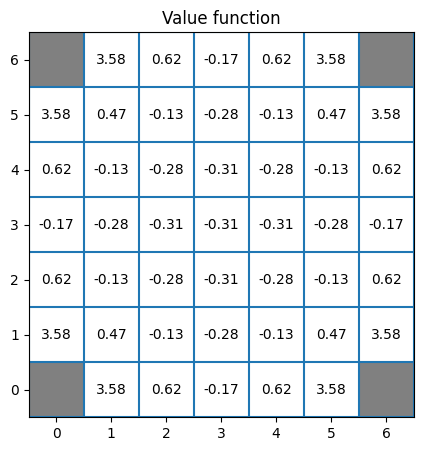

In [16]:
plot_matrix(V, goal_coords, annotate_goal=False, title='Value function')

# Updating the policy matrix


In [17]:
# Upating the policy 
update_policy(S, P, V)

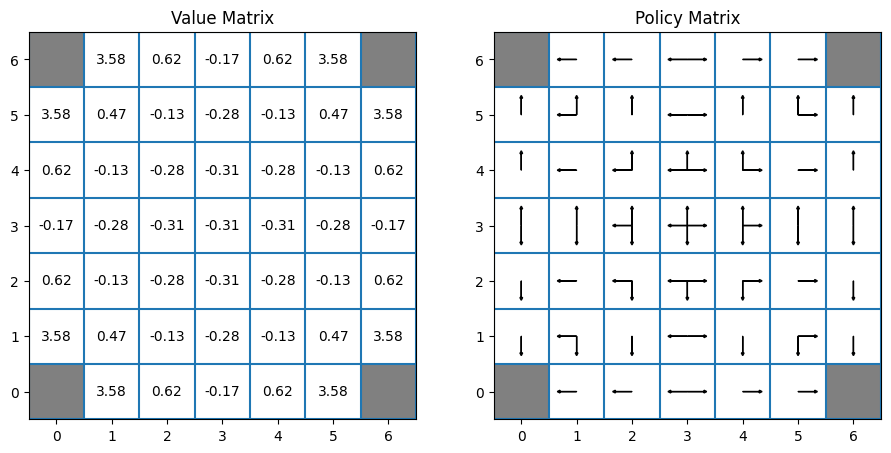

In [18]:
plot_policy_value_matrix(P, S, V, goal_coords, img_width=11, img_height=11, annotate_goal=False)

# Functionalities for reproducibility 

In [19]:
def init_policy(S: np.array) -> np.array:
    # Saving all the unique states to a vector 
    states = np.unique(S)

    # Saving the shape of the matrix 
    n = S.shape[0]

    # Dictionary to hold each action for a given state
    P = {}
    for s in states: 
        s_dict = {}

        # Checking which index is the current state in the S matrix 
        s_index = np.where(S == s)

        # If the state is in the top left corner, we can only move right and down
        if s_index == (0, 0):
            s_dict['right'] = 0.5
            s_dict['down'] = 0.5
        
        # If the state is in the top right corner, we can only move left and down
        elif s_index == (0, n - 1):
            s_dict['left'] = 0.5
            s_dict['down'] = 0.5
        
        # If the state is in the bottom left corner, we can only move right and up
        elif s_index == (n - 1, 0):
            s_dict['right'] = 0.5
            s_dict['up'] = 0.5
        
        # If the state is in the bottom right corner, we can only move left and up
        elif s_index == (n - 1, n - 1):
            s_dict['left'] = 0.5
            s_dict['up'] = 0.5
        
        # If the state is in the first row, we can only move left, right, and down
        elif s_index[0] == 0:
            s_dict['left'] = 0.333
            s_dict['right'] = 0.333
            s_dict['down'] = 0.333
        
        # If the state is in the last row, we can only move left, right, and up
        elif s_index[0] == n - 1:
            s_dict['left'] =  0.333
            s_dict['right'] = 0.333
            s_dict['up'] = 0.333
        
        # If the state is in the first column, we can only move up, down, and right
        elif s_index[1] == 0:
            s_dict['up'] = 0.333
            s_dict['down'] = 0.333
            s_dict['right'] = 0.333
        
        # If the state is in the last column, we can only move up, down, and left
        elif s_index[1] == n - 1:
            s_dict['up'] = 0.333
            s_dict['down'] = 0.333
            s_dict['left'] = 0.333

        # If the state is in the middle, we can move in all directions
        else:
            s_dict['up'] = 0.25
            s_dict['down'] = 0.25
            s_dict['left'] = 0.25
            s_dict['right'] = 0.25

        # Saving the current states trasition probabilities
        P[s] = s_dict
    
    return P

In [20]:
def init_gridworld(n: int, step_reward: float) -> Tuple: 
    # Creating the reward matrix 
    G = np.zeros((n, n)) 
    G[G == 0] = step_reward

    # Initiating the empty value array 
    V = np.zeros((n, n))

    # Creating the state array
    S = np.arange(0, n * n).reshape(n, n)

    # Initializing the policy
    P = init_policy(S)

    return S, P, G, V

def add_random_goal(G: np.array, goal_reward) -> np.array: 
    # Extracting the shape of the matrix 
    n = G.shape[0]
    
    # Getting random coords
    x = np.random.randint(n)
    y = np.random.randint(n)

    # Adding the goal value inplace
    G[x, y] = goal_reward

    # Returning the goal coordinates
    return x, y

def add_goal(G: np.array, goal_reward, x: int, y: int) -> np.array: 
    # Adding the goal value inplace
    G[x, y] = goal_reward